# ANALISIS LABELING MANUAL

In [67]:
import pandas as pd

df_manual = pd.read_excel("labeling manual.xlsx")
df_manual.head()

,text,sentiment_label
0,malu sama kaleng sarden dan hongguan yg bisa t...,Negatif
1,"Berguna kagak, membodohi iya.. 💀",Negatif
2,Berhentikan rangka esaf🤬,Negatif
3,"kuning2 di rangka esaf itu EMAS TAI, bukan KARAT",Negatif
4,Mana penjelasan honda jngn lepas tangan,Negatif


# Cleansing
Menghapus tanda baca,url, spasi dll.

In [68]:
#regular expression (regex)
import re
import string

def cleaning(Text, replacements=None):
    if pd.isnull(Text):  # Check if Text is NaN
        return ""
    # Mengganti huruf yang berulang-ulang ('oooooo' menjadi '00')
    Text = re.sub(r'(.)\1+', r'\1\1', Text)
    # Mengganti 2 atau lebih titik dengan spasi
    Text = re.sub(r'\.{2,}', ' ', Text)
    # Menghapus @username
    Text = re.sub('@[^\s]+','', Text)
    # Menghapus angka
    Text = re.sub('[0-9]+', '', Text)
    # Menghapus URL
    Text = re.sub(r"http\S+", "", Text)
    # Menghapus hashtag
    Text = re.sub(r'#', '', Text)
    # Menghapus spasi, tanda kutip ganda ("), dan tanda kutip tunggal (') dari teks
    Text = Text.strip(' "\'')
    # Mengganti beberapa spasi dengan satu spasi
    Text = re.sub(r'\s+', ' ', Text)
    # Menghapus tanda baca
    Text = Text.translate(str.maketrans("", "", string.punctuation))
    # Menghapus karakter tidak diinginkan menggunakan kamus pengganti khusus jika disediakan
    if replacements:
        for old, new in replacements.items():
            Text = Text.replace(old, new)
    # Mengembalikan teks yang telah dibersihkan
    return Text

In [69]:
df_manual['textClean_cleaning_manual'] = df_manual['text'].apply(cleaning)
df_manual['textClean_cleaning_manual']

0       malu sama kaleng sarden dan hongguan yg bisa t...
1                           Berguna kagak membodohi iya 💀
2                                Berhentikan rangka esaf🤬
3          kuning di rangka esaf itu EMAS TAI bukan KARAT
4                 Mana penjelasan honda jngn lepas tangan
                              ...                        
4505    Pcx gen bro sma rambut lu aja msih tebel rambu...
4506    Kejadian yang saya rasain pas dulu pasang stik...
4507    Hee udah lama om Orangnya aja kelewat tutup ma...
4508    MAU UNTUNG AJA LU MANA TANGGUNG JAWABMU LU KIR...
4509    Udah sering lihat motot honda beat ahm patah p...
Name: textClean_cleaning_manual, Length: 4510, dtype: object

# Case Folding, Clean Emoji
Merubah huruf kapital menjadi huruf kecil dan membersihkan emoticon

In [70]:
#regular expression (regex)
import re

def casefolding(text):
  # Mengubah teks ke huruf kecil (lowercase)
  text = text.lower()
  # Menghapus emoticon
  # Pola regex untuk mendeteksi berbagai karakter emoticon dan simbol
  emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
  # Mengganti semua emoticon dan simbol yang terdeteksi dengan string kosong
  text = emoji_pattern.sub(r'', text)
  # Menghapus karakter non-ASCII
  encoded_string = text.encode("ascii", "ignore")
  # Mengubah kembali byte string menjadi string normal
  text = encoded_string.decode()
  # Mengembalikan teks yang sudah dibersihkan
  return text

In [71]:
df_manual['textClean_casefolding_manual'] = df_manual['textClean_cleaning_manual'].apply(casefolding)
df_manual['textClean_casefolding_manual']

0       malu sama kaleng sarden dan hongguan yg bisa t...
1                            berguna kagak membodohi iya 
2                                 berhentikan rangka esaf
3          kuning di rangka esaf itu emas tai bukan karat
4                 mana penjelasan honda jngn lepas tangan
                              ...                        
4505    pcx gen bro sma rambut lu aja msih tebel rambut  
4506    kejadian yang saya rasain pas dulu pasang stik...
4507    hee udah lama om orangnya aja kelewat tutup ma...
4508    mau untung aja lu mana tanggung jawabmu lu kir...
4509    udah sering lihat motot honda beat ahm patah p...
Name: textClean_casefolding_manual, Length: 4510, dtype: object

# Stemming
kata yang memiliki imbuhan menjadi kata dasar

In [72]:
#Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [73]:
df_manual['textClean_stemmer_manual'] = df_manual['textClean_casefolding_manual'].apply(stemmer.stem)
df_manual['textClean_stemmer_manual']

0       malu sama kaleng sarden dan hongguan yg bisa t...
1                                    guna kagak bodoh iya
2                                       henti rangka esaf
3          kuning di rangka esaf itu emas tai bukan karat
4                      mana jelas honda jngn lepas tangan
                              ...                        
4505      pcx gen bro sma rambut lu aja msih tebel rambut
4506    jadi yang saya rasain pas dulu pasang stiker o...
4507    hee udah lama om orang aja lewat tutup mata sa...
4508    mau untung aja lu mana tanggung jawab lu kira ...
4509    udah sering lihat motot honda beat ahm patah p...
Name: textClean_stemmer_manual, Length: 4510, dtype: object

# Slangwords
mengindentifikasi kata-kata slang (kata gaul) lalu akan diganti ke kata yang lebih baku atau umum

In [74]:
# Membaca file CSV 'kbba.txt' yang berisi kamus kata slang dan formalnya
kbba_dictionary = pd.read_csv('kbba.txt', delimiter='\t', names=['slang', 'formal'], header=None, encoding='utf-8')
# Membuat kamus dari DataFrame 'kbba_dictionary', di mana 'slang' adalah key dan 'formal' adalah value
slang_dict = dict(zip(kbba_dictionary['slang'], kbba_dictionary['formal']))
# Menampilkan DataFrame 'kbba_dictionary' untuk melihat isi kamus slang dan formal
kbba_dictionary

def convert_slangword(text):
    words = text.split()
    normalized_words = [slang_dict[word] if word in slang_dict else word for word in words]
    normalized_text = ' '.join(normalized_words)
    return normalized_text

In [75]:
df_manual['textClean_slang_manual'] = df_manual['textClean_stemmer_manual'].apply(convert_slangword)
df_manual['textClean_slang_manual']

0       malu sama kaleng sarden dan kongguan yang bisa...
1                                 berguna tidak bodoh iya
2                                       henti rangka esaf
3       kuning di rangka esaf itu emas kotoran bukan k...
4                    mana jelas honda jangan lepas tangan
                              ...                        
4505    pcx gen saudara laki-laki sama rambut kamu saj...
4506    jadi yang saya rasain pas dulu pasang stiker o...
4507    hee sudah lama om orang saja lewat tutup mata ...
4508    mau untung saja kamu mana tanggung jawab kamu ...
4509    sudah sering lihat motot honda beat ahm patah ...
Name: textClean_slang_manual, Length: 4510, dtype: object

# Stopword
ini akan menghapus seluruh kata yang dianggap tidak penting, yang mana tidak akan mempengaruhi sentimen pada kalimat. Kata yang tidak penting disini adalah kata sambung seperti, di, ke, ini, dan, dari, segala, itu.

In [76]:
# Import modul StopWord dari library nlp_id untuk penghapusan stopwords
from nlp_id.stopword import StopWord
# Inisialisasi objek StopWord untuk pengolahan stopwords bahasa Indonesia
stopword = StopWord()
# Dapatkan daftar stopwords dari modul StopWord
stopwords = stopword.get_stopword()

# Hapus kata "tidak" dari daftar stopwords
if "tidak" in stopwords:
    stopwords.remove("tidak")
# Fungsi untuk menghapus stopwords dengan pengecualian kata "tidak"
def remove_stopwords_with_exception(text):
    words = text.split()
    cleaned_words = [word for word in words if word not in stopwords]
    return " ".join(cleaned_words)

In [77]:
# Gunakan fungsi remove_stopwords_with_exception pada kolom "textClean_slang"
df_manual["Text_Clean_manual"] = df_manual["textClean_slang_manual"].apply(remove_stopwords_with_exception)
df_manual["Text_Clean_manual"]

0                    malu kaleng sarden kongguan tahan ah
1                                     berguna tidak bodoh
2                                       henti rangka esaf
3                   kuning rangka esaf emas kotoran karat
4                                      honda lepas tangan
                              ...                        
4505    pcx gen saudara laki-laki rambut msih tebel ra...
4506    rasain pasang stiker oracal honda cbr dealer c...
4507                         hee om orang tutup mata merk
4508    untung tanggung bayar daun mangga kualitas jag...
4509          lihat motot honda beat ahm patah porek depa
Name: Text_Clean_manual, Length: 4510, dtype: object

# Unwanted Word Removal
menghapus Kata-kata yang tidak diinginkan yang akan dihapus dari teks

In [78]:
# Import NLTK untuk tokenisasi
import nltk
from nltk import word_tokenize, sent_tokenize
#Unduh dataset 'punkt' dari NLTK untuk tokenisasi teks
nltk.download('punkt')

# menghapus Kata-kata yang tidak diinginkan yang akan dihapus dari teks
unwanted_words = ['jan','feb','mar','apr','mei','jun','jul','aug','sep','oct','nov','dec','uaddown','weareuad','Iam','https','igshid']

def RemoveUnwantedwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if not word in unwanted_words]
    return ' '.join(filtered_sentence)

[nltk_data] Downloading package punkt to C:\Users\Yuki Prasetya
[nltk_data]     Mukmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
df_manual["Text_Clean_lagi_manual"] = df_manual["Text_Clean_manual"].apply(RemoveUnwantedwords)
df_manual["Text_Clean_lagi_manual"]

0                    malu kaleng sarden kongguan tahan ah
1                                     berguna tidak bodoh
2                                       henti rangka esaf
3                   kuning rangka esaf emas kotoran karat
4                                      honda lepas tangan
                              ...                        
4505    pcx gen saudara laki-laki rambut msih tebel ra...
4506    rasain pasang stiker oracal honda cbr dealer c...
4507                         hee om orang tutup mata merk
4508    untung tanggung bayar daun mangga kualitas jag...
4509          lihat motot honda beat ahm patah porek depa
Name: Text_Clean_lagi_manual, Length: 4510, dtype: object

# Menghapus kata di bawah 3 huruf

In [80]:
df_manual["Text_Clean_lagi_manual"] = df_manual["Text_Clean_lagi_manual"].str.findall('\w{3,}').str.join(' ')
df_manual["Text_Clean_lagi_manual"]

0                       malu kaleng sarden kongguan tahan
1                                     berguna tidak bodoh
2                                       henti rangka esaf
3                   kuning rangka esaf emas kotoran karat
4                                      honda lepas tangan
                              ...                        
4505    pcx gen saudara laki laki rambut msih tebel ra...
4506    rasain pasang stiker oracal honda cbr dealer c...
4507                            hee orang tutup mata merk
4508    untung tanggung bayar daun mangga kualitas jag...
4509          lihat motot honda beat ahm patah porek depa
Name: Text_Clean_lagi_manual, Length: 4510, dtype: object

# Tokenizing
proses pemisahan kata, pemisahan kata pada setiap kalimat dilakukan berdasarkan delimeter yaitu adanya spasi pada setiap kata.

In [81]:
# Mengimpor modul NLTK untuk pengolahan bahasa alami
import nltk
# Mengimpor fungsi word_tokenize dari NLTK
from nltk.tokenize import word_tokenize
# Mengunduh dataset 'punkt' dari NLTK yang digunakan untuk tokenisasi kata
nltk.download('punkt')

def tokenize(teks):
    list_teks = []
    words = teks.split(" ")
    i = 0
    while i < len(words):
        if words[i] == "tidak" and i + 1 < len(words) and words[i + 1] == "percaya":
            list_teks.append("tidak percaya")
            i += 2
        else:
            list_teks.append(words[i])
            i += 1
    return list_teks


[nltk_data] Downloading package punkt to C:\Users\Yuki Prasetya
[nltk_data]     Mukmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
df_manual["Text_Clean_split_manual"] = df_manual["Text_Clean_lagi_manual"].apply(tokenize)
df_manual["Text_Clean_split_manual"].head()

0         [malu, kaleng, sarden, kongguan, tahan]
1                         [berguna, tidak, bodoh]
2                           [henti, rangka, esaf]
3    [kuning, rangka, esaf, emas, kotoran, karat]
4                          [honda, lepas, tangan]
Name: Text_Clean_split_manual, dtype: object

# Export Data

In [83]:
# # Export Data
# from datetime import datetime
# # Get the current date and time
# current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# # Create the filename with the current date and time
# filename = f'hasil_labelling_manual.xlsx'
# # Export DataFrame to Excel
# df_manual.to_excel(filename, index=False)

# Labeling Data (manual)

In [84]:
def sentiment_manual_label(text_labels):
    positive_words = []
    negative_words = []
    neutral_words = []
    
    for word, label in text_labels:
        if label.lower() == 'positive':
            positive_words.append(word)
        elif label.lower() == 'negative':
            negative_words.append(word)
        else:
            neutral_words.append(word)
    
    total_positive = len(positive_words)
    total_negative = len(negative_words)
    total_neutral = len(neutral_words)
    
    score = total_positive - total_negative
    
    polarity = ''
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'
    
    result = {'positif': positive_words, 'negatif': negative_words, 'netral': neutral_words}
    return score, polarity, result, positive_words, negative_words, neutral_words

In [85]:
df_manual['sentiment_label'] = df_manual['sentiment_label'].replace({'Positif': 'positive', 'Negatif': 'negative', 'Netral': 'neutral'})

In [86]:
# Gabungkan Text_Clean_split_manual dengan sentiment_label menjadi satu daftar tuple
df_manual['text_labels'] = df_manual.apply(lambda row: list(zip(row['Text_Clean_split_manual'], row['sentiment_label'].split())), axis=1)

# Terapkan fungsi sentiment analysis ke kolom text_labels
df_manual['sentiment_analysis'] = df_manual['text_labels'].apply(sentiment_manual_label)

# Pisahkan hasil menjadi kolom-kolom terpisah
hasil = list(zip(*df_manual['sentiment_analysis']))
df_manual['polarity_score'] = hasil[0]
df_manual['polarity'] = hasil[1]
df_manual['result'] = hasil[2]
df_manual['positive_words'] = hasil[3]
df_manual['negative_words'] = hasil[4]
df_manual['neutral_words'] = hasil[5]

# Filter DataFrame hanya untuk sentimen yang bukan netral
df_manual = df_manual[df_manual['polarity'] != 'neutral']

In [87]:
# Menghitung jumlah data
print("Jumlah data:")
print(df_manual['polarity'].value_counts().sum())

# Menampilkan detail sentimen
print("\nDetail:")
print(df_manual['polarity'].value_counts())


Jumlah data:
4510

Detail:
polarity
negative    3239
positive    1271
Name: count, dtype: int64


# Top Kata Positif Dan Kata Negatif
menampilkan 10 top kata negatif positif

In [88]:
import pandas as pd

def top_words(hasil_kata_positive, hasil_kata_negative):
    # Menggabungkan semua kata positif dan negatif
    all_positive_words = [word for sublist in hasil_kata_positive for word in sublist]
    all_negative_words = [word for sublist in hasil_kata_negative for word in sublist]
    
    # Menghitung frekuensi kata positif dan negatif
    positive_freq = pd.Series(all_positive_words).value_counts().reset_index().rename(columns={'index': 'Positive Word', 0: 'Frequency'})
    negative_freq = pd.Series(all_negative_words).value_counts().reset_index().rename(columns={'index': 'Negative Word', 0: 'Frequency'})
    
    # Mengambil 11 kata teratas
    top_11_positive = positive_freq.head(11)
    top_11_negative = negative_freq.head(11)
    
    return top_11_positive, top_11_negative

# Mendapatkan kata-kata teratas
top_kata_positive, top_kata_negative = top_words(df_manual['positive_words'], df_manual['negative_words'])

# Mengubah hasil menjadi DataFrame
result3 = pd.DataFrame(top_kata_positive)
result4 = pd.DataFrame(top_kata_negative)

# Menampilkan hasil
print(f"{result3}\n\n{result4}")


   Positive Word  count
0                    68
1          honda     56
2         yamaha     50
3          motor     36
4         rangka     33
5           beli     32
6          tidak     30
7          pakai     20
8    klarifikasi     16
9         untung     16
10        suzuki     15

   Negative Word  count
0          honda    201
1          tidak    141
2         rangka    101
3    klarifikasi     87
4          motor     81
5           beli     63
6        silikat     54
7            ahm     54
8         recall     41
9          pakai     39
10         karat     36


# Visualisasi Data

# Worcloud

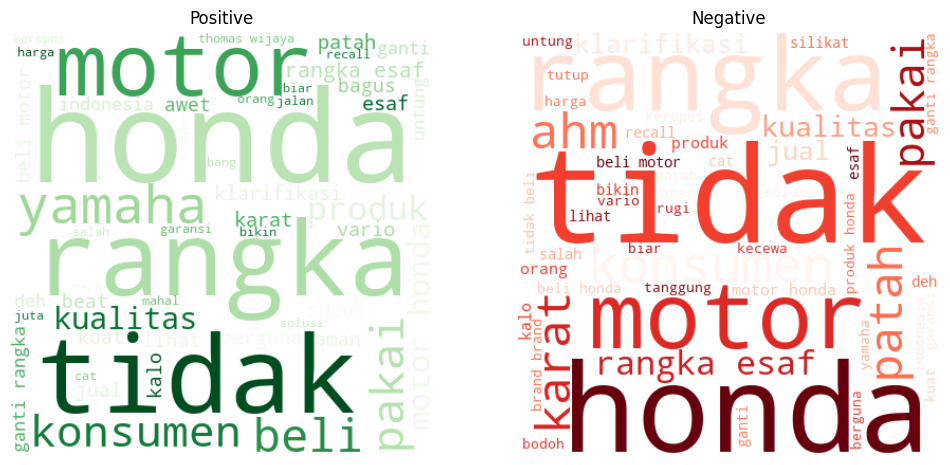

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Ambil semua kata-kata positif
positive_words = ' '.join(df_manual[df_manual['polarity'] == 'positive']['Text_Clean_split_manual'].apply(lambda x: ' '.join(x)))

# Membuat wordcloud dari kata-kata positif
wc_positive = WordCloud(background_color="white", colormap="Greens", max_words=50, width=400, height=400)
wc_positive.generate(positive_words)

# Ambil semua kata-kata negatif
negative_words = ' '.join(df_manual[df_manual['polarity'] == 'negative']['Text_Clean_split_manual'].apply(lambda x: ' '.join(x)))

# Membuat wordcloud dari kata-kata negatif
wc_negative = WordCloud(background_color="white", colormap="Reds", max_words=50, width=400, height=400)
wc_negative.generate(negative_words)

# Menampilkan kedua wordcloud dalam satu figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
ax1.imshow(wc_positive, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Positive')

ax2.imshow(wc_negative, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Negative')

plt.show()

# Diagram Pie

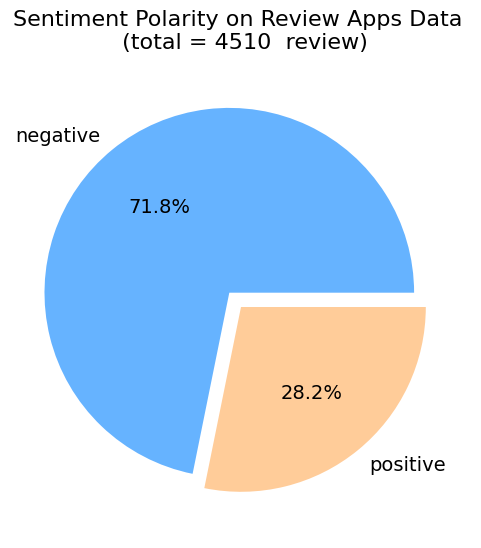

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df_manual['polarity'].value_counts()]
labels = list(df_manual['polarity'].value_counts().index)
explode = (0.1 , 0)
#jika pakek netral
# explode = (0.1, 0, 0) 
colors = ['#66b3ff', '#ffcc99', '#ff9999']
ax.pie(x = sizes, labels = labels, colors=colors, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title(f"Sentiment Polarity on Review Apps Data \n (total = {str(len(df_manual['Text_Clean_split_manual']))}  review)", fontsize = 16, pad = 20)
plt.show()

# TF-IDF (term frequency-inverse document frequency)
TF-IDF digunakan untuk mengubah data teks menjadi vektor namun dengan memperhatikan apakah sebuah kata tersebut cukup informatif atau tidak

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
df_manual['polarity_encoded'] = label_encoder.fit_transform(df_manual['polarity'])

# TF-IDF vectorizer
df_manual['Text_Clean_split_manual'] = df_manual['Text_Clean_lagi_manual'].astype(str)
tfidf = TfidfVectorizer()
ulasan = df_manual['Text_Clean_split_manual'].values.tolist()
X = tfidf.fit_transform(ulasan)
y = df_manual['polarity_encoded']

print(X[0:2])

  (0, 3575)	0.3778464037738816
  (0, 2654)	0.34934900046012035
  (0, 5289)	0.5141863864006836
  (0, 3084)	0.5719619737828533
  (0, 5828)	0.379024051505032
  (1, 645)	0.6488015936812619
  (1, 6025)	0.3293830438163691
  (1, 814)	0.6859761675764826


# Split Data

In [92]:
#melakukan proses pemisahan data train dan data test

from pandas. core. common import random_state
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

data_latih = len(y_train)
data_test = len(y_test)
all_data = len(y)

print("Total Keseluruhan Data : ", all_data)
print("Total Data Latih : ", data_latih)
print("Total Data Test : ", data_test)

Total Keseluruhan Data :  4510
Total Data Latih :  4059
Total Data Test :  451


 # Modeling Metode Naive Bayes Classifier

In [93]:
#menghitung akurasi dengan menggunakan metode naive bayes classifier

from sklearn import naive_bayes
from sklearn import metrics

nb = naive_bayes.MultinomialNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_nb = score
print("Akurasi dengan menggunakan Naive Bayes: ", score*100,"%")

Akurasi dengan menggunakan Naive Bayes:  72.50554323725056 %


# Hasil proses report Classification Report :

In [94]:
#merekap hasil dari confusion matrix

from sklearn.metrics import classification_report
print("RFC Classification Report : \n", classification_report(y_test, y_pred))

RFC Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.99      0.84       324
           1       0.64      0.06      0.10       127

    accuracy                           0.73       451
   macro avg       0.68      0.52      0.47       451
weighted avg       0.70      0.73      0.63       451



# Evaluasi Confusion Matrix

Akurasi: 0.7250554323725056


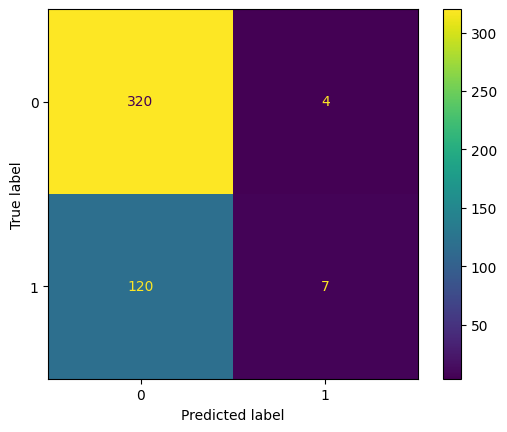

Rumus :
{TP + TN}{TP + TN + FP + FN} = akurasi
Hitung akurasi menggunakan rumus :
{7 + 320}{7 + 320 + 120 + 4} = 72.5\%
Precison :  0.6818181818181819
Recall :  0.5213862156119373
F Score :  0.46957280522042644


In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import MultinomialNB  # Pastikan Anda menggunakan model yang sesuai

# Prediksi
y_pred = nb.predict(X_test)

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

# Menghitung metrik tambahan dari confusion matrix
TP = cm[1,1]
TN = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
hasil = pd.DataFrame({ "Tipe Data" : ["True Negative", "True Positive", "False Negative", "False Positive"],
"Hasil" : [TN, TP, FN, FP]})
result_accuracy = round((TN + TP) / (TP + TN + FP + FN), 3) * 100
print("Rumus :")
print(r'''{TP + TN}{TP + TN + FP + FN} = akurasi''')
print("Hitung akurasi menggunakan rumus :")
print(r'''{%d + %d}{%d + %d + %d + %d} = %s\%%''' % (TP, TN, TP, TN, FP, FN, result_accuracy))

from sklearn.metrics import precision_recall_fscore_support
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ", P[0])
print("Recall : ", P[1])
print("F Score : ", P[2])


In [96]:
#import ke pickle
import pickle

# pickle.dump((nb,tfidf),open('model.pkl','wb'))

with open('model/label_manual/model_manual.pkl', 'wb') as model_file:
        pickle.dump(nb, model_file)
    
with open('model/label_manual/label_encoder_manual.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

with open('model/label_manual/tfidf_vectorizer_manual.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf, tfidf_file)